<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/LSTM_Keras_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM_Keras_Tesla

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import set_random_seed


Using TensorFlow backend.


In [15]:
set_random_seed(42)
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/tesla-stocks.csv')

df = df.drop(columns=['Date', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

df

,Open
0,19.000000
1,25.790001
2,25.000000
3,23.000000
4,20.000000
...,...
1687,244.820007
1688,246.110001
1689,257.000000
1690,262.399994


In [16]:
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['target']=0.0

df.head()

,Open,d1,d2,d3,d4,target
0,19.000000,0.0,0.0,0.0,0.0,0.0
1,25.790001,0.0,0.0,0.0,0.0,0.0
2,25.000000,0.0,0.0,0.0,0.0,0.0
3,23.000000,0.0,0.0,0.0,0.0,0.0
4,20.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
for i in range(1000):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]
ndf=df[:1000].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
X=np.array(ndf)
print(X.shape)
print(X[:3])
X=X[:,:,np.newaxis]
print(X.shape)
X[:3]

(1000, 5)
[[19.       25.790001 25.       23.       20.      ]
 [25.790001 25.       23.       20.       16.4     ]
 [25.       23.       20.       16.4      16.139999]]
(1000, 5, 1)


array([[[19.      ],
        [25.790001],
        [25.      ],
        [23.      ],
        [20.      ]],

       [[25.790001],
        [25.      ],
        [23.      ],
        [20.      ],
        [16.4     ]],

       [[25.      ],
        [23.      ],
        [20.      ],
        [16.4     ],
        [16.139999]]])

In [18]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1000/1000 [==============================] - 1s 809us/step - loss: 7531.9666
Epoch 2/200
1000/1000 [==============================] - 0s 144us/step - loss: 4667.0619
Epoch 3/200
1000/1000 [==============================] - 0s 133us/step - loss: 3009.0811
Epoch 4/200
1000/1000 [==============================] - 0s 141us/step - loss: 609.7099
Epoch 5/200
1000/1000 [==============================] - 0s 141us/step - loss: 66.1019
Epoch 6/200
1000/1000 [==============================] - 0s 142us/step - loss: 55.5832
Epoch 7/200
1000/1000 [==============================] - 0s 153us/step - loss: 52.0169
Epoch 8/200
1000/1000 [==============================] - 0s 143us/step - loss: 50.6539
Epoch 9/200
1000/1000 [==============================] - 0s 140us/step - loss: 49.1756
Epoch 10/200
1000/1000 [==============================] - 0s 154us/step - loss: 47.2450
Epoch 11/200
1000/1000 [==============================] - 0s 154us/step - loss: 43.5263
Epoch 12/200
1000/1000 [==========

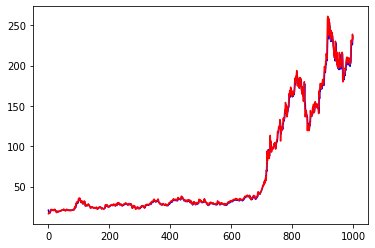

(35.599998, array([34.053783], dtype=float32))

In [19]:
ye = model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye, color='blue')
plt.plot(y, color='red')
plt.show()

y[100], ye[100] # estimate nth day.

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
